In [1]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [10]:
y5_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(20)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y5_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y5_summary_dict['iteration'].append(i)
    y5_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y5_summary_dict['score'].append(tmp_sorted.score.values[0])
    y5_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y5_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y5_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y5_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y5_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y5_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(tmp_sorted.weights.values[0].ravel())

y5_summary = pd.DataFrame(y5_summary_dict)

y5_summary['problem_loss'] = y5_summary.total_loss - y5_summary.orbit_loss - y5_summary.zero_loss - y5_summary.exit_orbit_loss

print(y5_summary)

100%|██████████| 20/20 [00:04<00:00,  4.69it/s]

    iteration  n_features     score  \
0           0           3  0.434365   
1           1           4  0.440369   
2           2           5  0.490567   
3           3           6  0.522458   
4           4           7  0.595158   
5           5           8  0.848609   
6           6           9  0.909147   
7           7          10  0.948005   
8           8          11  0.964111   
9           9          12  0.967810   
10         10          13  0.972522   
11         11          14  0.978120   
12         12          15  0.978969   
13         13          16  0.980009   
14         14          17  0.980517   
15         15          18  0.981450   
16         16          19  0.982285   
17         17          20  0.983368   
18         18          21  0.984133   
19         19          22  0.986205   

                                              weights  \
0            [[1.0088115], [1.1261446], [-0.7681058]]   
1   [[6.1630936], [4.03104], [-0.7857264], [-7.019...   
2   [[25.

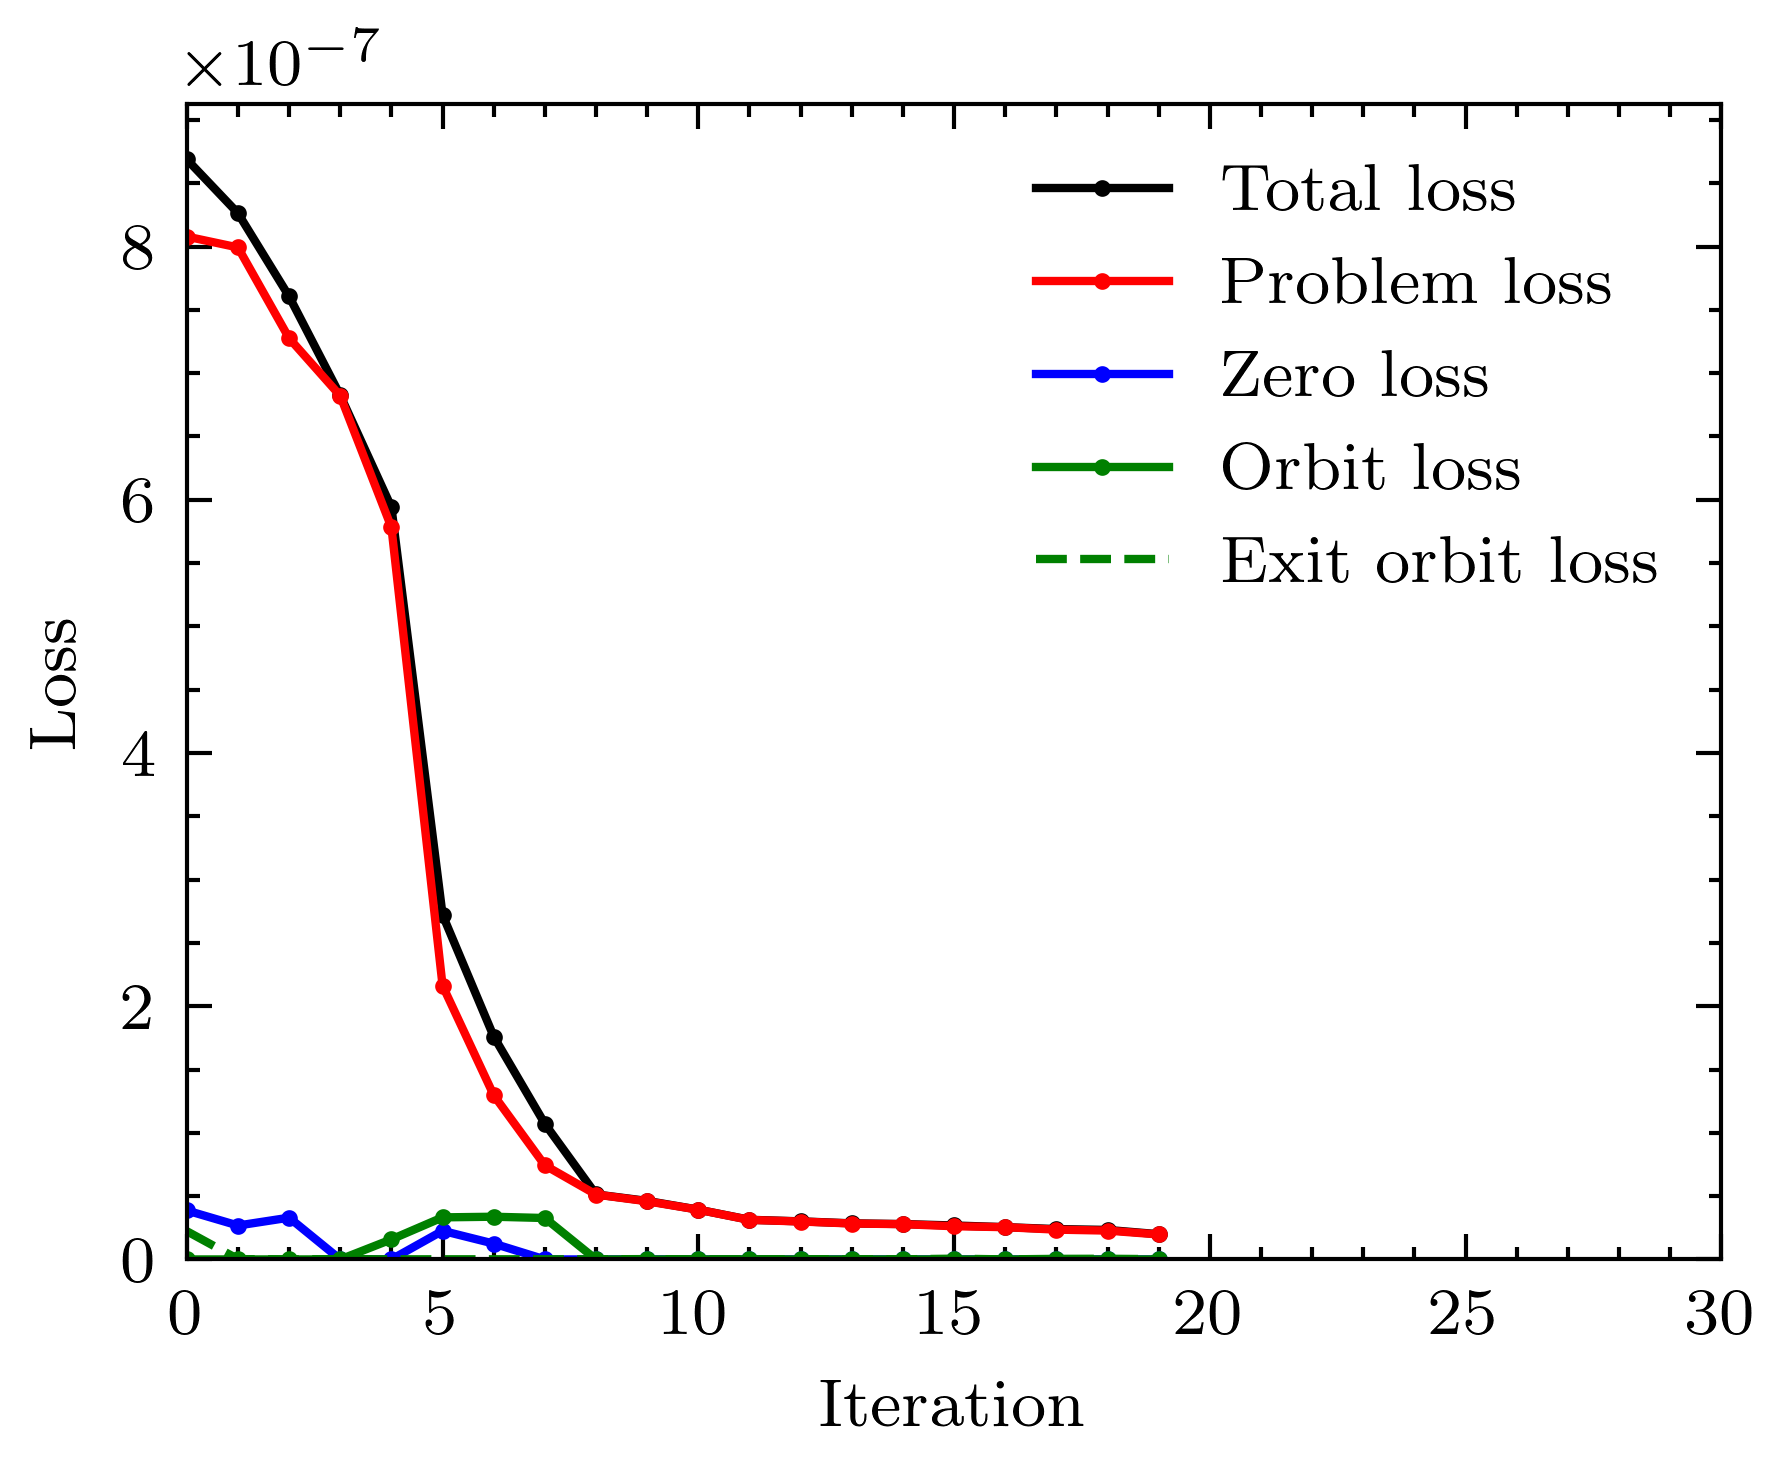

In [11]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y5_summary.iteration, y5_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y5_summary.iteration, y5_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y5_summary.iteration, y5_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y5_summary.iteration, y5_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y5_summary.iteration, y5_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

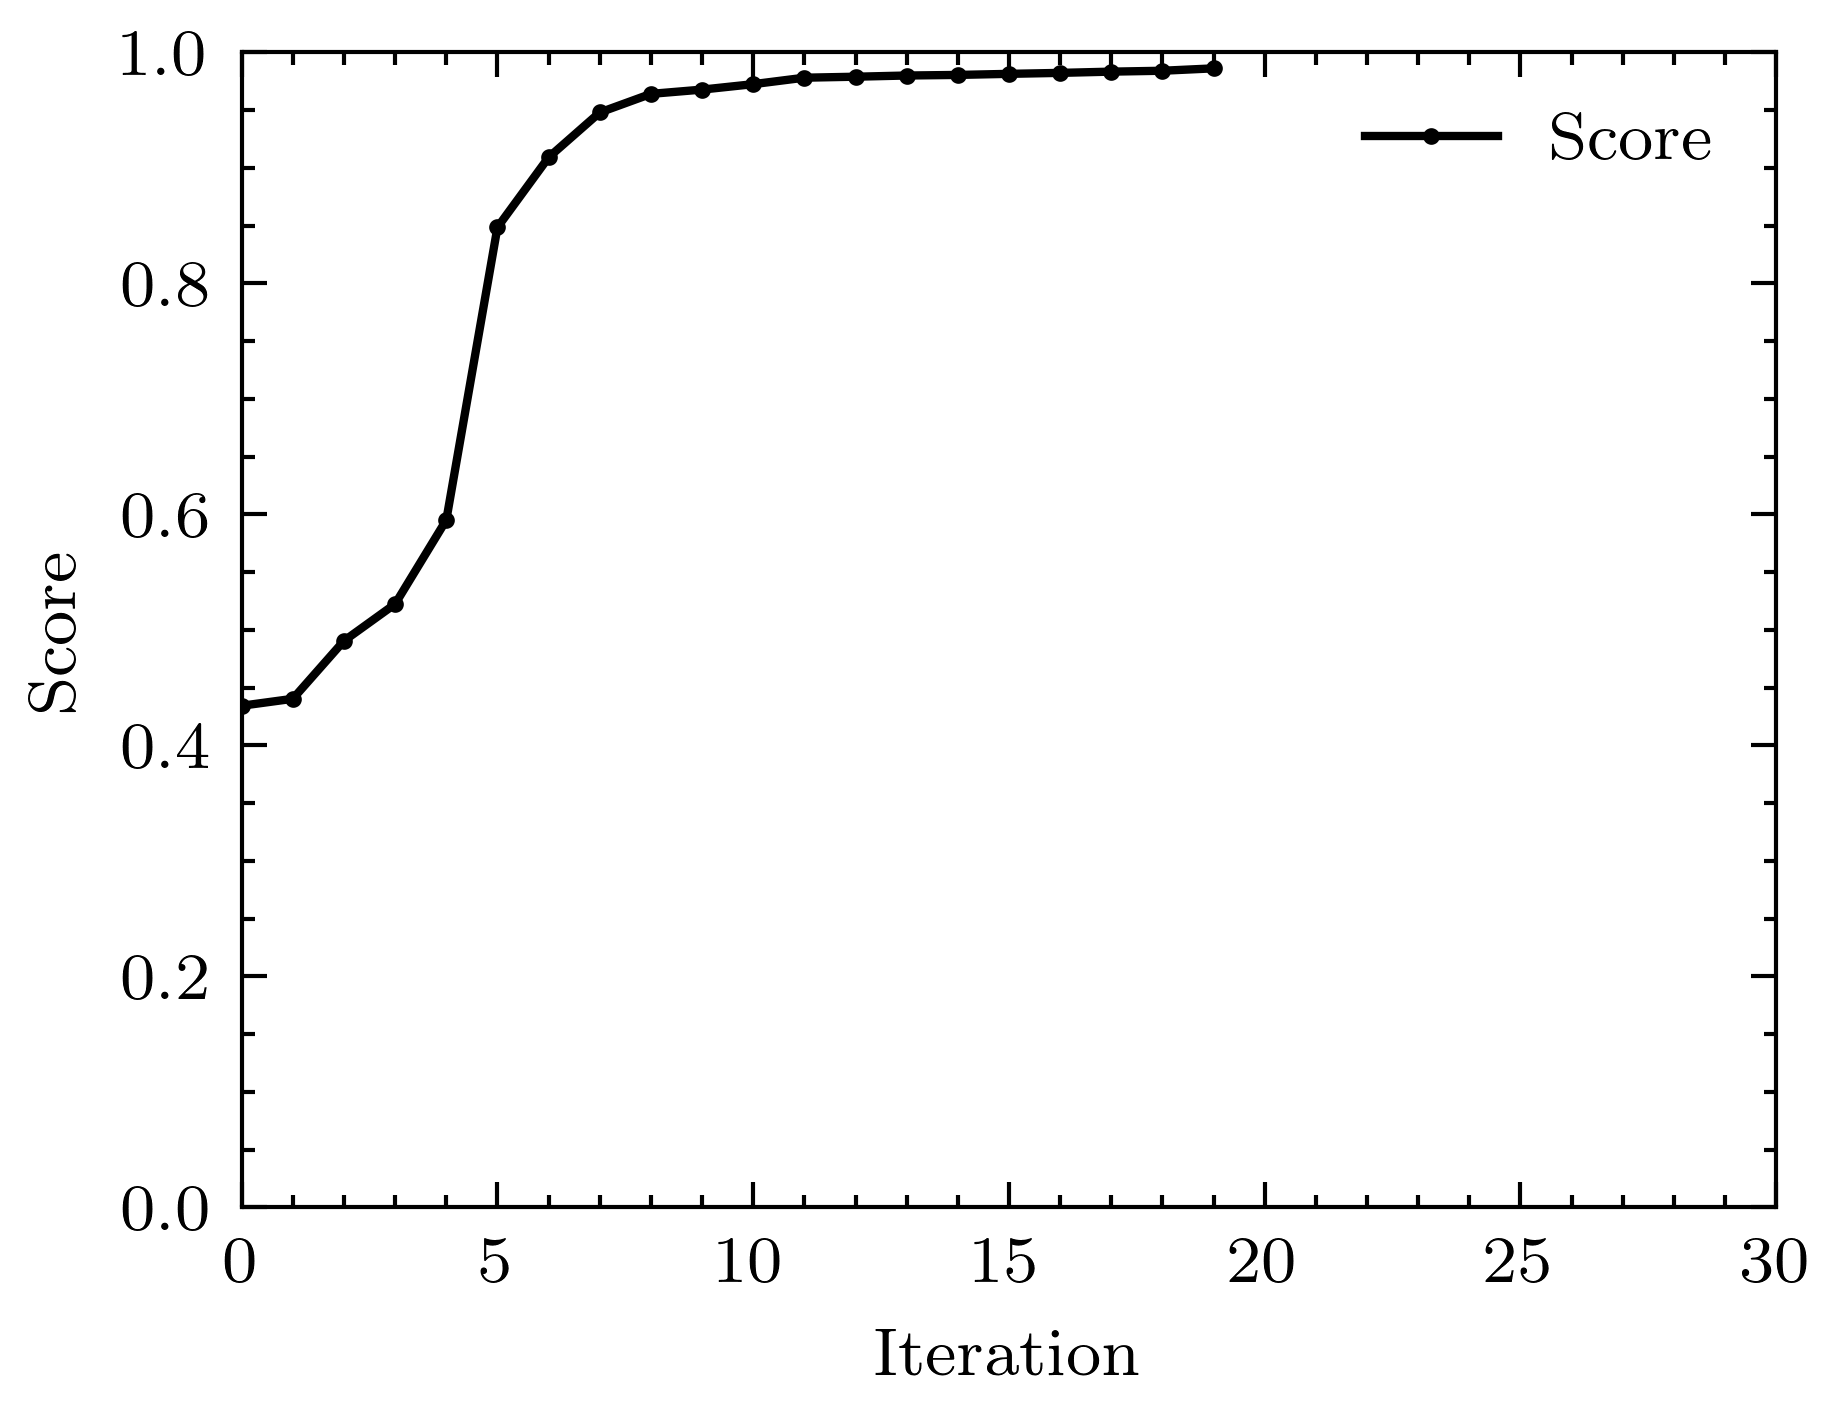

In [12]:
with plt.style.context(['science', 'ieee']):
#    plt.plot(y8_summary.n_features, y8_summary.total_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y5_summary.iteration, y5_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

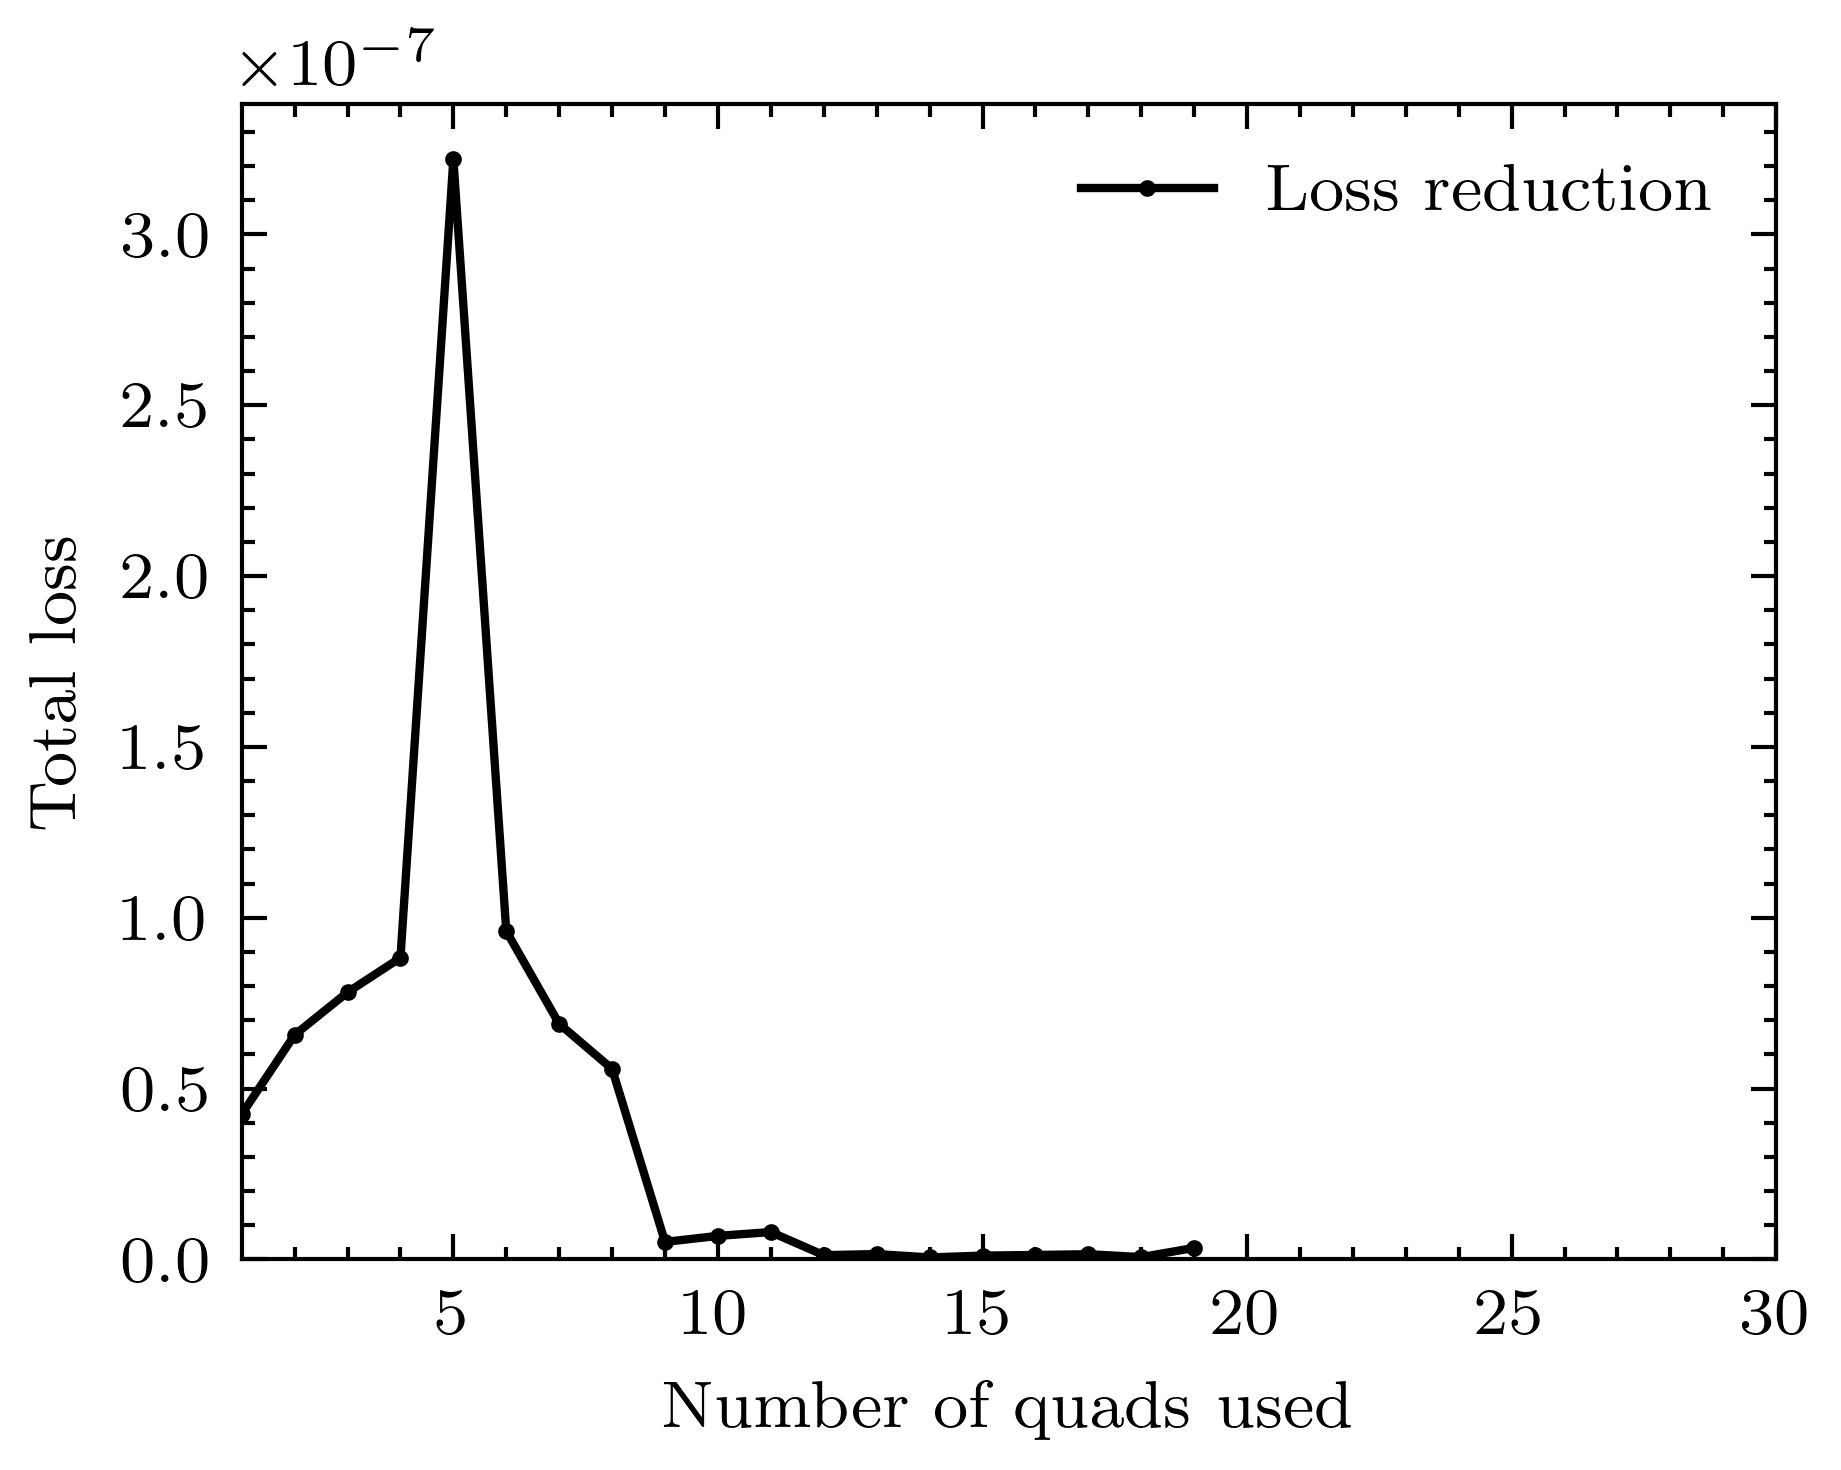

In [13]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y5_summary.total_loss)):
    loss_reduction.append(y5_summary.total_loss[i - 1] - y5_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y5_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
    plt.ylim(0, )
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

In [14]:
import placetmachine as pl

In [15]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [16]:
knobs_setup = {
    "Y5": f"data/learning_storage/orbit_supression_2/Y5_sfs1_it10",
}

In [17]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [18]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[52.589233, 24.192154, -6.794914, -53.63966, 4.5129313, -3.119878, -1.0049086, -4.1625276, -5.0811276, 5.888484, 6.1651525, -1.9204162, 0.9997077] [2061, 2062, 1687, 2059, 2043, 1729, 1645, 1568, 1605, 1557, 2054, 1553, 1531]
   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1481  3466.28456  0.0  52.589233  0.0  0.0
1        Quadrupole    1485  3475.65118  0.0  24.192154  0.0  0.0
2        Quadrupole     277   646.31198  0.0  -6.794914  0.0  0.0
3        Quadrupole    1473  3447.55132  0.0 -53.639660  0.0  0.0
4        Quadrupole    1409  3297.68540  0.0   4.512931  0.0  0.0
5        Quadrupole     361   843.01100  0.0  -3.119878  0.0  0.0
6        Quadrupole     193   449.61296  0.0  -1.004909  0.0  0.0
7        Quadrupole      80   185.07421  0.0  -4.162528  0.0  0.0
8        Quadrupole     117   271.65384  0.0  -5.081128  0.0  0.0
9        Quadrupole      69   159.33432  0.0   5.888484  0.0  0.0
10       Quadrupole    1453  3400.71822  0.0   6

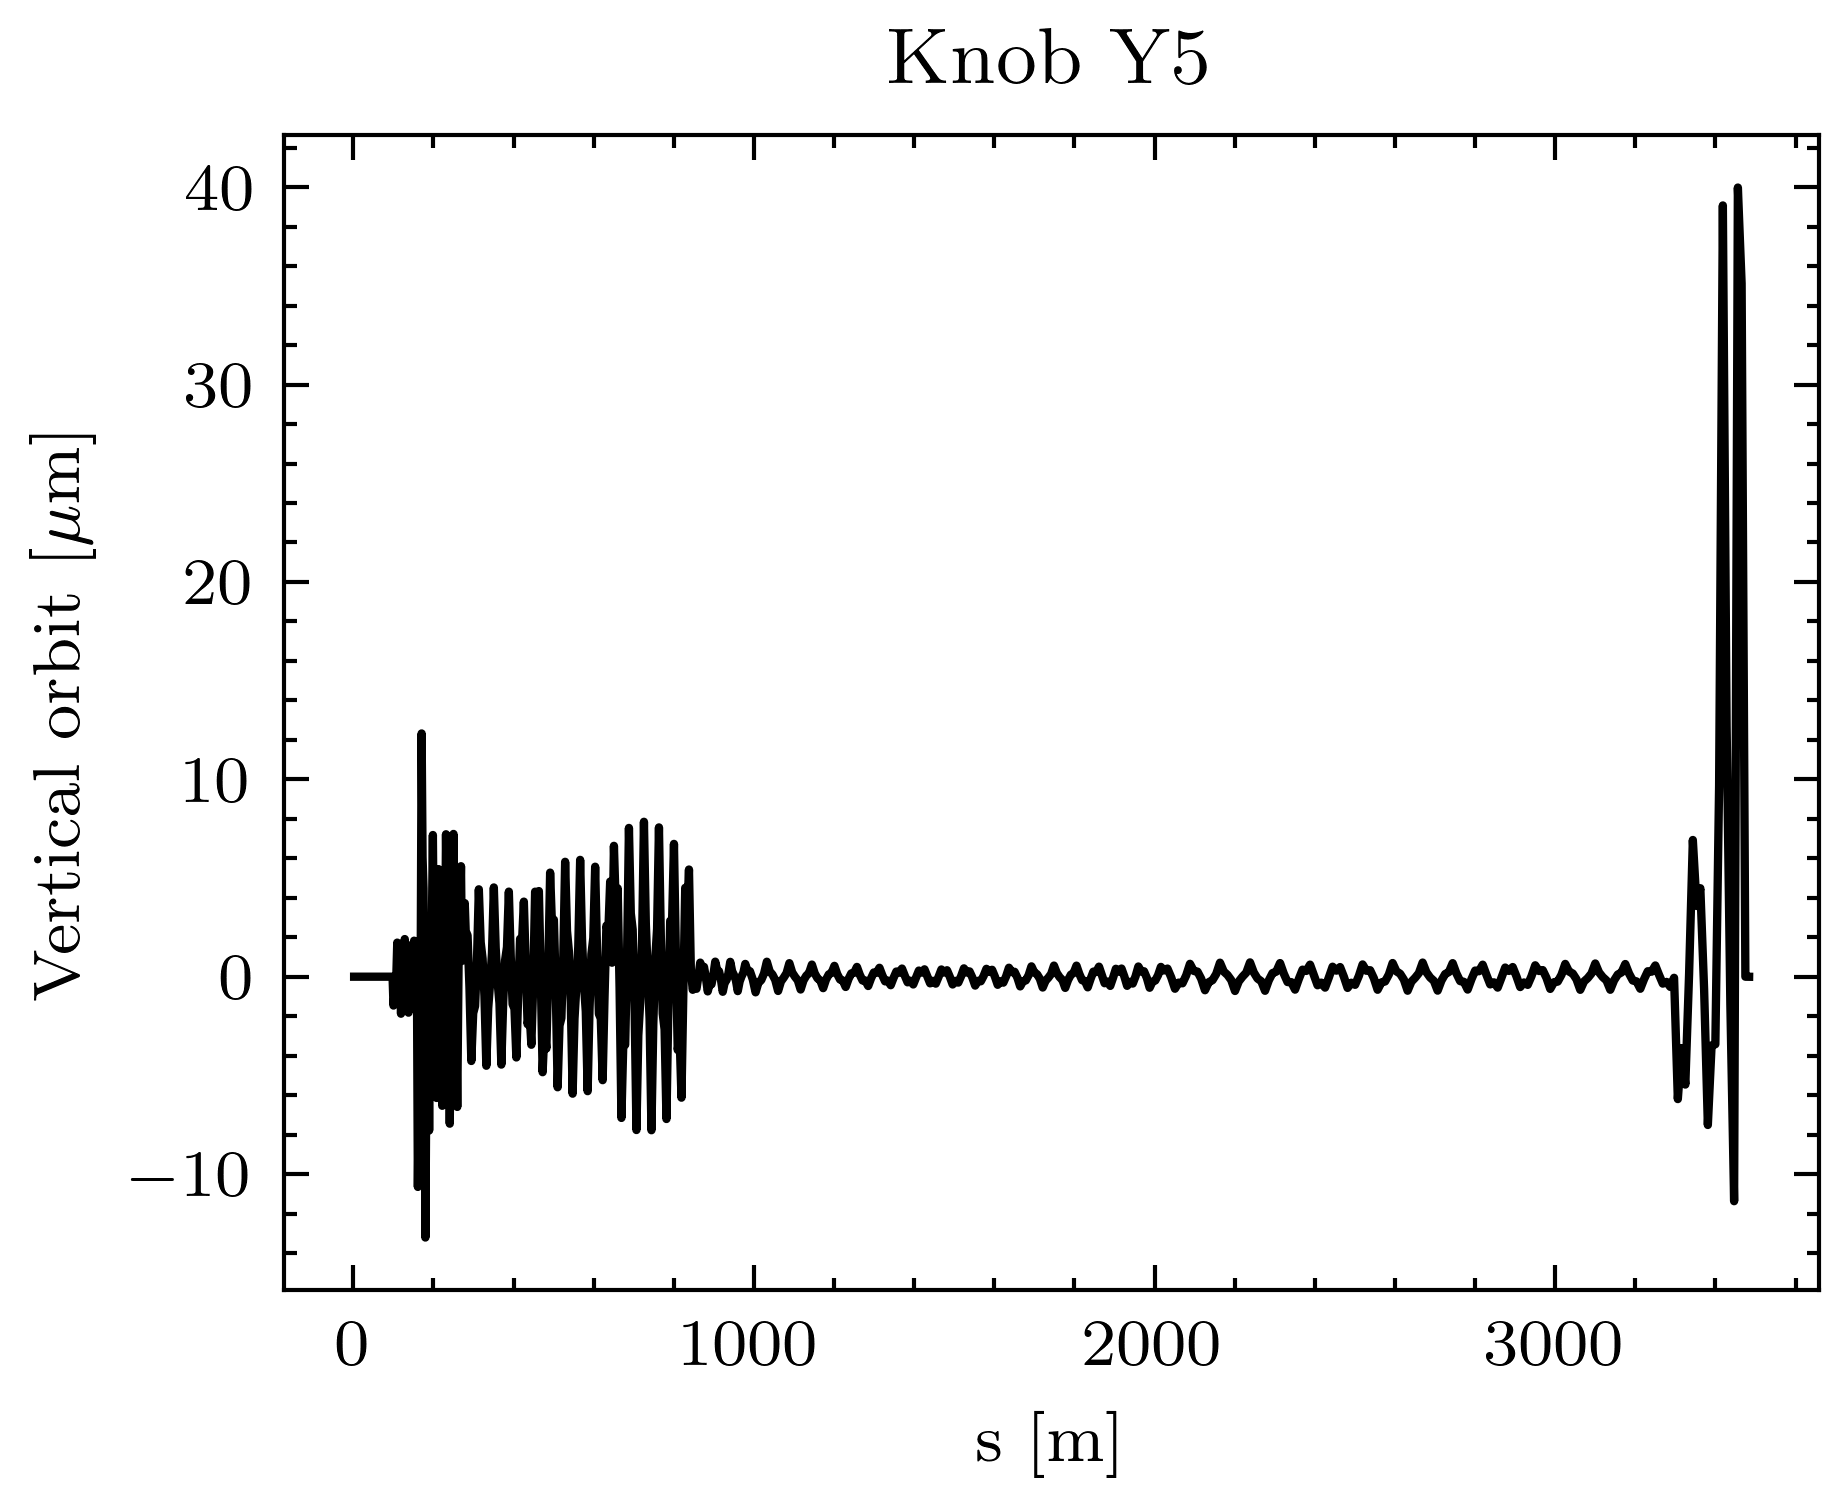

The last 2 BPMs orbit -0.45549 nm and -3.5303 nm


In [19]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y5")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")